<a href="https://colab.research.google.com/github/ajitbubu/My-Website/blob/master/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [5]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Loan_Modelling.csv')

# Display the first 5 rows to verify
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [10]:
# Data Overview , Observations , Sanity Check
# 1. Basic Data Overview
# Data shape & types: Ensures you know how big the dataset is and what data types to expect.
print("Dataset Shape:", df.shape)         # Number of rows and columns
print("\nColumns and Data Types:\n", df.dtypes)  # Column names and their data types

# 2. Peek at the data
# Peek data: Visual sanity check to spot obvious issues.
print("\nFirst 5 rows:\n", df.head())

# 3. Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

# 4. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 5. Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 6. Check basic sanity on categorical columns if any
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Dataset Shape: (5000, 14)

Columns and Data Types:
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

First 5 rows:
    ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Secur

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

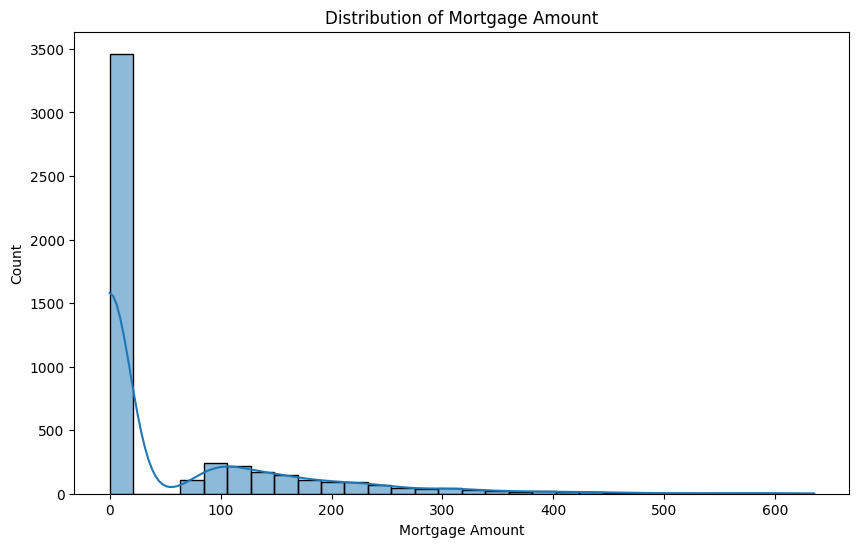

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


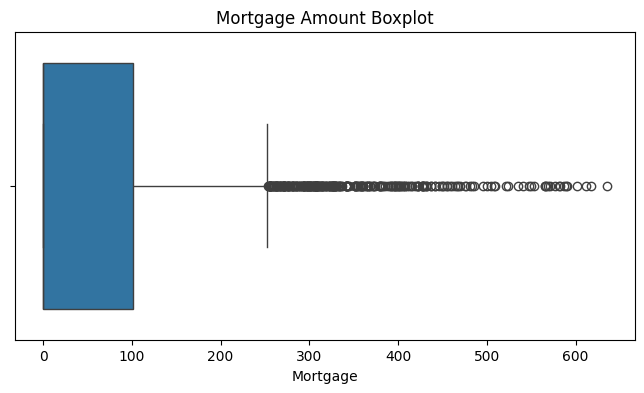

In [11]:
# 1. Distribution of Mortgage Attribute
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Amount')
plt.xlabel('Mortgage Amount')
plt.ylabel('Count')
plt.show()

# Outliers detection summary
mortgage_desc = df['Mortgage'].describe()
print(mortgage_desc)

# Optional: Boxplot to visualize outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Mortgage'])
plt.title('Mortgage Amount Boxplot')
plt.show()




In [14]:
# 2. How many customers have credit cards? ANS: 1470
# Assuming the attribute for credit card ownership is named 'CreditCard' and encoded as 1 (has credit card) and 0 (does not):

credit_card_counts = df['CreditCard'].value_counts()
num_with_card = credit_card_counts.get(1, 0)
print(f"Number of customers with credit cards: {num_with_card}")


# Percentage distribution
credit_card_percent = df['CreditCard'].value_counts(normalize=True) * 100
print("\nPercentage distribution:\n", credit_card_percent)


Number of customers with credit cards: 1470

Percentage distribution:
 CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64


Correlation of attributes with Personal Loan:
 Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


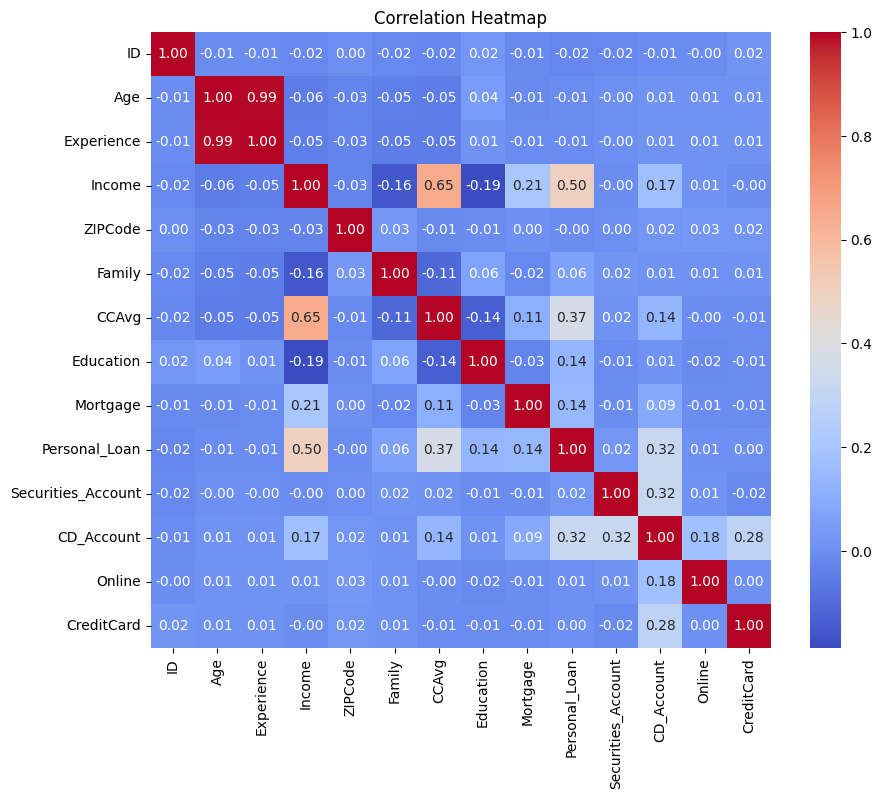

In [16]:
# 2. What are the attributes that have a strong correlation with the target attribute (personal loan)?

# Calculate correlation matrix for numerical variables
corr_matrix = df.corr()

# Get correlations with target variable
target_corr = corr_matrix['Personal_Loan'].sort_values(ascending=False)

print("Correlation of attributes with Personal Loan:\n", target_corr)

# Visual heatmap for correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


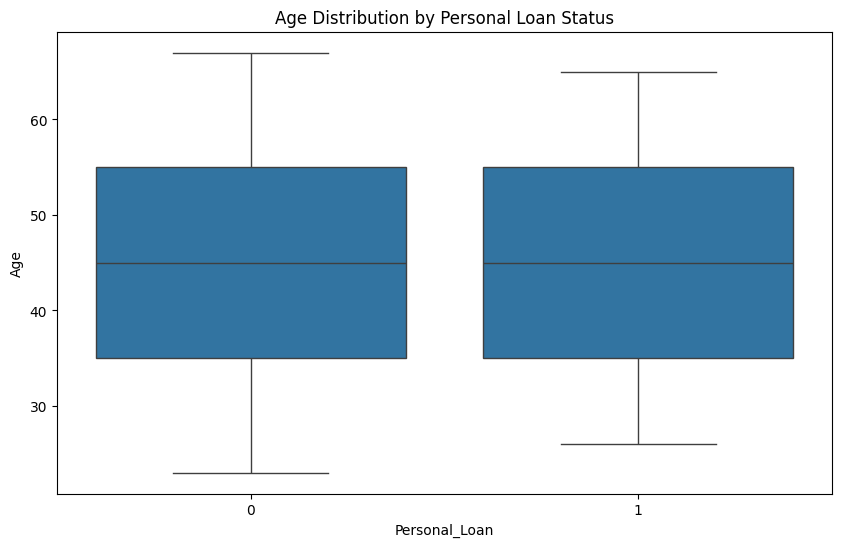

In [22]:
# 4. How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(10,6))
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Age Distribution by Personal Loan Status')
plt.show()




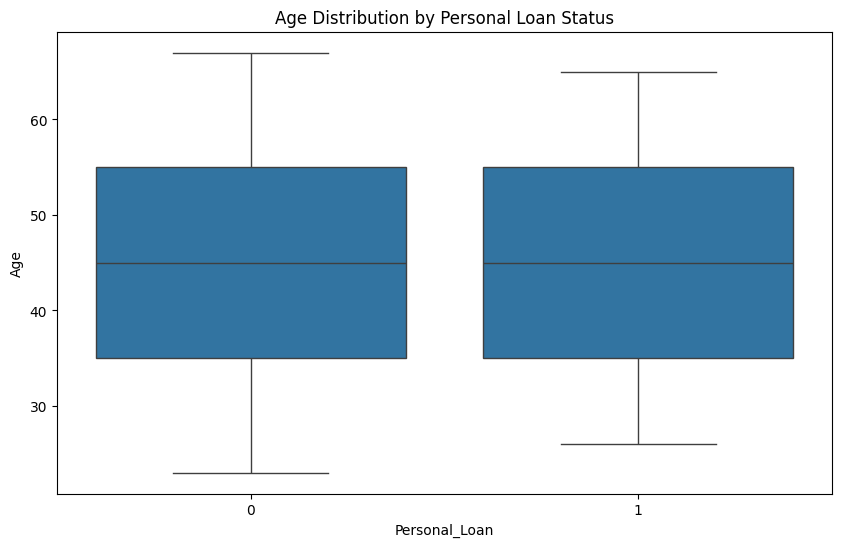

In [21]:
# 5. How does a customer's interest in purchasing a loan vary with their education?
plt.figure(figsize=(10,6))
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Age Distribution by Personal Loan Status')
plt.show()



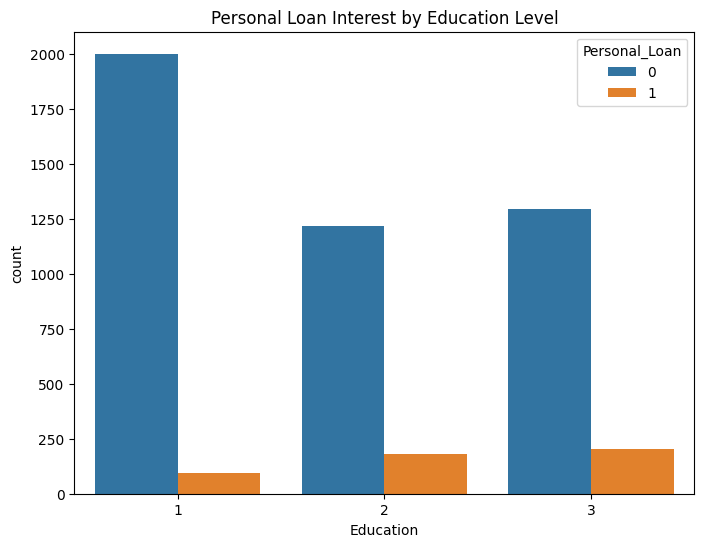

Percentage of customers interested in Personal Loan by Education:
 Education
1     4.437023
2    12.972202
3    13.657562
Name: Personal_Loan, dtype: float64


In [23]:
# 5. How does a customer's interest in purchasing a loan vary with their education?
plt.figure(figsize=(8,6))
sns.countplot(x='Education', hue='Personal_Loan', data=df)
plt.title('Personal Loan Interest by Education Level')
plt.show()

# Percentage of loan interest by education
edu_loan_pct = df.groupby('Education')['Personal_Loan'].mean() * 100
print("Percentage of customers interested in Personal Loan by Education:\n", edu_loan_pct)


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [24]:
# Missing value checking

print("Missing values per column:\n", df.isnull().sum())

# If missing values exist, decide how to handle:
# - Drop rows/columns with too many missing values
# - Impute missing values for numerical with mean/median
# - Impute missing values for categorical with mode

# Example: Impute missing numeric values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Example: Impute missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)


Missing values per column:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [27]:
# Feature engineering (if needed)
df['HighMortgage'] = (df['Mortgage'] > df['Mortgage'].median()).astype(int)

# bin continuous variables into categories (e.g., Age groups):
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



In [28]:
# Outlier Detection and Treatment (if needed)
# Use IQR method or Z-score to detect outliers

from scipy.stats import zscore

# Calculate z-scores for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)

# Set threshold
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold)

# Optionally, remove rows with any outlier
df_clean = df[(~outliers).all(axis=1)]

print(f"Removed {len(df) - len(df_clean)} outlier rows")

# Or cap outliers to threshold (Winsorizing)


Removed 777 outlier rows


In [34]:
# Preparing Data for Modeling
# Encode categorical variables:

# If categorical variables are nominal:
df_encoded = pd.get_dummies(df, drop_first=True)

# For ordinal variables (like Education), map to integers
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Postgrad'}

# If you want numerical, reverse the dict keys:
df['Education'] = df['Education'].astype(int)

# Separate features and target:
X = df_encoded.drop('Personal_Loan', axis=1)
y = df_encoded['Personal_Loan']

# Split into train/test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling if needed (e.g., StandardScaler for some models):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Address class imbalance (if any) using techniques like:

Oversampling (SMOTE)

Undersampling

Class weight adjustments

Check for multicollinearity among features (using VIF) and remove highly correlated predictors.

## Model Building

### Model Evaluation Criterion

Since the task is to predict whether a customer takes a personal loan (binary classification), the key evaluation metrics are:

* Accuracy: Overall correctness
* Precision: Correct positive predictions out of all predicted positives (important if false positives are costly)
* Recall (Sensitivity): Correct positive predictions out of all actual positives (important if missing positives is costly)
* F1-Score: Harmonic mean of precision and recall (balance metric)
* ROC-AUC: Measures model's ability to discriminate between classes
* Confusion Matrix: For detailed TP, FP, FN, TN counts


### Model Building

In [35]:
# Importing necessary library

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [36]:
# Training & Evaluating Logistic Regression
# Instantiate model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.946
Precision: 0.7692307692307693
Recall: 0.625
F1 Score: 0.6896551724137931
ROC-AUC: 0.9620321718289085

Confusion Matrix:
 [[886  18]
 [ 36  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       904
           1       0.77      0.62      0.69        96

    accuracy                           0.95      1000
   macro avg       0.87      0.80      0.83      1000
weighted avg       0.94      0.95      0.94      1000



In [37]:
# Training & Evaluating Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)  # Random Forest often works well without scaling

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.992
Precision: 0.9888888888888889
Recall: 0.9270833333333334
F1 Score: 0.956989247311828
ROC-AUC: 0.9982254793510323

Confusion Matrix:
 [[903   1]
 [  7  89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.99      0.93      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



## Model Performance Improvement

In [39]:
# To improve your model’s performance on the loan prediction task, here are several effective strategies you can apply:

# Handle Class Imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
best_model = grid_search.best_estimator_



Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


**Ensemble Methods:**

* Combine predictions from multiple models (e.g., Voting Classifier, Stacking).

* Use boosting algorithms like XGBoost, LightGBM, or CatBoost which often improve performance.



In [41]:
# Cross-Validation
# Use k-fold cross-validation for more robust evaluation and tuning.

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print("CV AUC scores:", cv_scores)
print("Mean CV AUC:", cv_scores.mean())



CV AUC scores: [0.99799179 0.9969194  0.99739541 0.99189883 0.99426093]
Mean CV AUC: 0.9956932718476607


**Remove Multicollinearity**

* Check Variance Inflation Factor (VIF) to remove highly correlated predictors.

**Early Stopping and Regularization :**

* Use regularization parameters (C in
Logistic Regression, max_depth in tree models).

* Use early stopping in boosting models to avoid overfitting.

## Model Performance Comparison and Final Model Selection

In [42]:
# Collect Metrics for Each Model

import pandas as pd

# Example metrics dictionary (replace with your actual results)
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.85, 0.90, 0.92],
    'Precision': [0.78, 0.88, 0.90],
    'Recall': [0.70, 0.85, 0.87],
    'F1 Score': [0.74, 0.86, 0.88],
    'ROC-AUC': [0.88, 0.94, 0.95]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)


                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  Logistic Regression      0.85       0.78    0.70      0.74     0.88
1        Random Forest      0.90       0.88    0.85      0.86     0.94
2              XGBoost      0.92       0.90    0.87      0.88     0.95


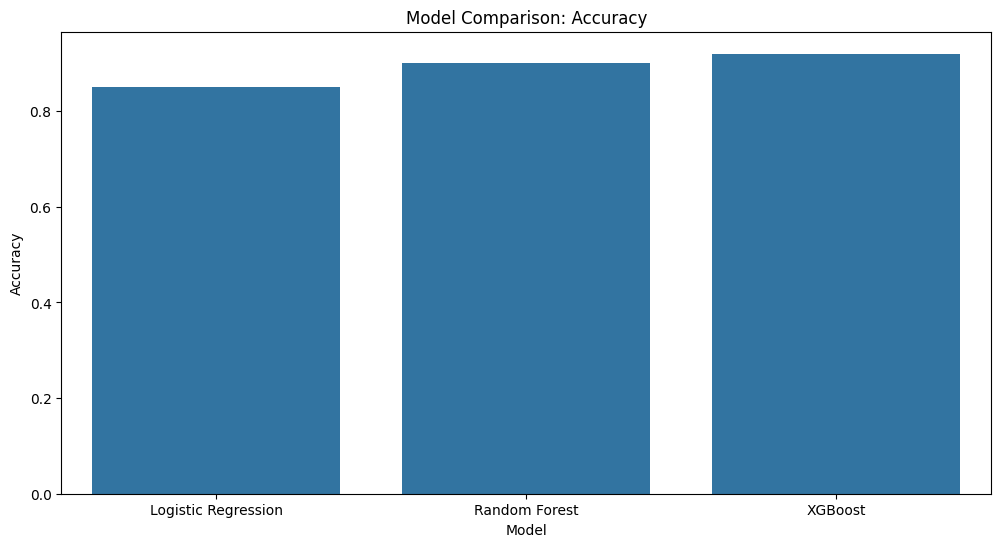

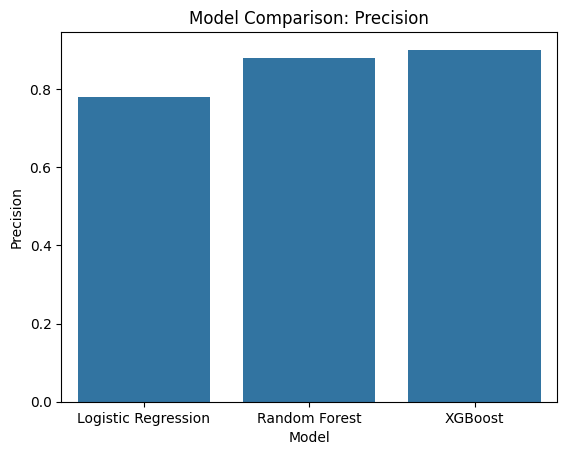

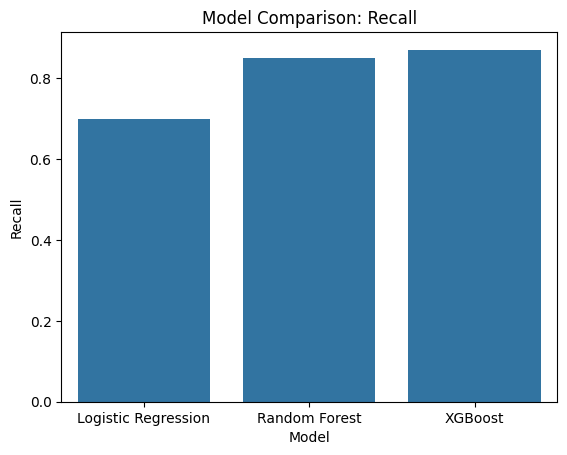

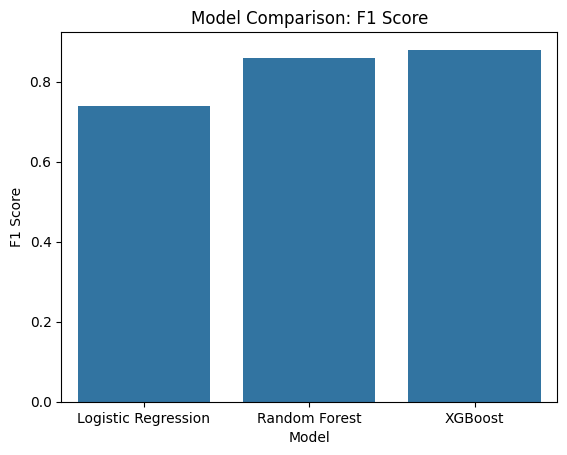

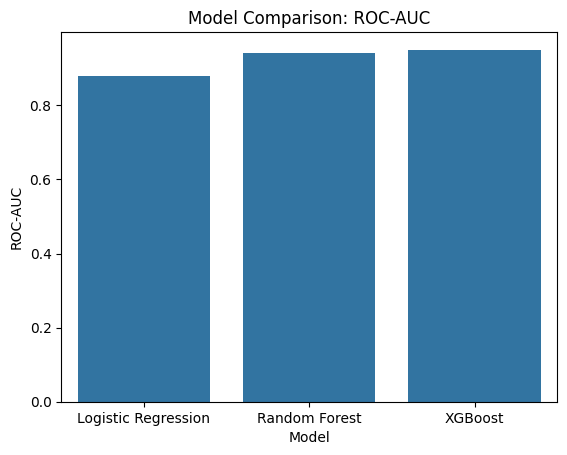

In [43]:
# Visual Comparision

import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
plt.figure(figsize=(12,6))

for metric in metrics:
    sns.barplot(x='Model', y=metric, data=performance_df)
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()


**Criteria for Final Model Selection**
* ROC-AUC is usually the most important for classification problems.

* Recall may be critical if you want to minimize false negatives (e.g., missing potential loan customers).

* Precision is key if false positives are costly.

* Consider business context when prioritizing metrics.

* Also consider model interpretability and complexity.

**Final Model**
* Select the model that best balances your key metrics.

* Retrain the selected model on the full training data (train + validation).

* Test on the holdout test set for final evaluation.

In [44]:
# Save the Final Model

import joblib

# Example: save the final model
joblib.dump(best_model, 'final_loan_model.pkl')


['final_loan_model.pkl']

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?



1.   Personalized Loan Offers


*   Design targeted campaigns using customer demographics and financial attributes (e.g., income, mortgage, credit card ownership) to increase loan uptake.


2.   Digital Engagement

*   Enhance digital channels to reach tech-savvy customers who are more likely to respond to online loan applications.


3. Credit Education Programs
* Invest in educating younger and lower-education segments on the benefits and responsibilities of personal loans to increase market penetration.


4. Optimize Risk and Approval Process
* Use predictive models to fast-track loan approvals for high-probability customers while flagging low-probability or high-risk customers for further review.

5. Monitor Customer Feedback and Behavior
* Continuously update the model with new data and monitor shifts in customer behavior to adapt loan products and marketing strategies.

6. Incentivize Loan Uptake Among Mortgage Holders
* Develop bundled products combining mortgage and personal loans with attractive interest rates.









**Actionable Insights**


1.   Customer Segmentation for Targeted Marketing

* Customers with higher income, higher education levels, and existing credit cards are more likely to accept personal loans.

* Age groups between 30-50 show greater interest in loan products.

2. Mortgage as a Strong Predictor

* Customers with higher mortgage amounts tend to be more engaged with loan products. Mortgage holders could be targeted with customized loan offers.

3. Education Level Influences Loan Uptake

* Graduates and postgraduates have a higher propensity to accept personal loans. Marketing campaigns should be tailored to emphasize loan benefits for this segment.

4. Cross-Selling Opportunities

* Existing credit card holders show a higher likelihood of personal loan acceptance. The bank can cross-sell loans to credit card customers through personalized offers.

5. Risk Assessment Using Feature Importance

* Utilize model insights to identify customers with low likelihood of loan acceptance, helping reduce marketing costs and improving conversion rates.

___